## Observations and Insights 

In [285]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
drug_study_df = study_results.merge(mouse_metadata, on = 'Mouse ID', how = 'outer')

# Display the data table for preview
data_table_preview_df = drug_study_df.sort_values(["Timepoint"], ascending = (True)).reset_index()
del data_table_preview_df['index']
data_table_preview_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,w584,0,45.0,0,Infubinol,Male,3,29
2,p136,0,45.0,0,Zoniferol,Female,5,28
3,a411,0,45.0,0,Ramicane,Male,3,22
4,b447,0,45.0,0,Ceftamin,Male,2,30


In [39]:
# Checking the number of mice.
number_of_mice = len(mouse_metadata["Mouse ID"])
print(f'Number of mice in drug study are :{number_of_mice}')

Number of mice in drug study are :249


In [97]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = drug_study_df.loc[drug_study_df.duplicated(subset=['Mouse ID', 'Timepoint',]),"Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [100]:
# Optional: Get all the data for the duplicate mouse ID. 
drug_study_df[drug_study_df['Mouse ID'].isin(duplicate_mice_id)==True]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [109]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df_after_dropping_duplicate = drug_study_df[drug_study_df['Mouse ID'].isin(duplicate_mice_id)==False]
clean_df_after_dropping_duplicate.head(5)                                         

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [116]:
# Checking the number of mice in the clean DataFrame.
mice_in_clean_df = clean_df_after_dropping_duplicate["Mouse ID"].nunique()
print(f'number of mice in the clean DataFrame : {mice_in_clean_df}')

number of mice in the clean DataFrame : 248


## Summary Statistics

In [140]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_study_mean_volume_df = drug_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_study_median_volume_df = drug_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_study_variance_volume_df = drug_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_study_stddev_volume_df = drug_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_study_sem_volume_df = drug_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
#drug_study_df.head(2)

pandas.core.series.Series

In [148]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_statistics_df = pd.DataFrame({"Mean Tumor Volume":  drug_study_mean_volume_df,
              "Median Tumor Volume": drug_study_median_volume_df,
              "Tumor Volume Variance": drug_study_variance_volume_df,
              "Tumor Volume Std. Dev.": drug_study_stddev_volume_df,
              "Tumor Volume Std.Err." : drug_study_sem_volume_df
             })
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [163]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

drug_study_volume_df = drug_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
drug_study_volume_df.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

[Text(0, 0.5, 'Number of Unique Mice Tested'), Text(0.5, 0, 'Drug Regimen')]

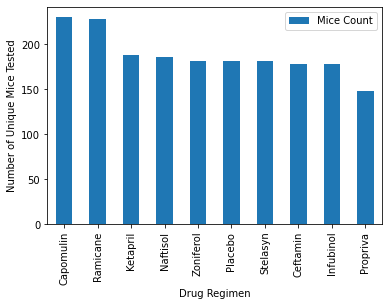

In [202]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#clean_df_after_dropping_duplicate["Drug Regimen","Mouse ID"].groupby()
bar_plot_mice_drug_df = clean_df_after_dropping_duplicate[["Mouse ID","Drug Regimen"]].groupby("Drug Regimen")
bar_plot_chart_df = bar_plot_mice_drug_df.count().rename(columns={"Mouse ID":"Mice Count"}
                                    ).sort_values("Mice Count",ascending = False
                                                 ).plot(kind = 'bar')

bar_plot_chart_df.set(xlabel = "Drug Regimen",ylabel = "Number of Unique Mice Tested")

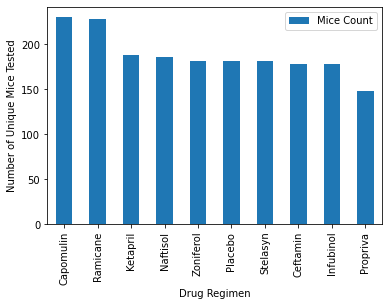

In [218]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bar_plot_chart_df = bar_plot_mice_drug_df.count().rename(columns={"Mouse ID":"Mice Count"}
                                    ).sort_values("Mice Count",ascending = False
                                                 )


bar_plot_chart_df.plot(kind = 'bar')
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")
plt.show()

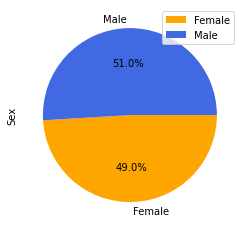

In [271]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

distribution_of_female_male_df = clean_df_after_dropping_duplicate[["Mouse ID","Sex"]].groupby("Sex").count().rename(columns={"Mouse ID":"Sex"})

distribution_of_female_male_df.plot.pie(y="Sex",autopct='%1.1f%%',colors = ["orange","royalblue"],counterclock=False) 

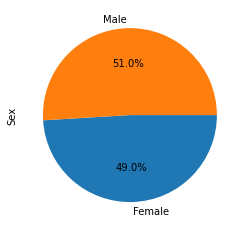

In [288]:
my_data = distribution_of_female_male_df.values.tolist()
plt.pie(my_data,autopct='%1.1f%%',counterclock=False,labels=["Female","Male"])
plt.ylabel("Sex")
plt.show(block=False)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
